# Homework 5

### Problem 1

Suppose that the molecular cloud that gave rise to the Sun’s family (solar siblings) had a radius of 10
parsecs and a total mass of $10 000 M_\odot$. Assume:
- The star formation efficiency SFE = 0.05, meaning that only 5% of the cloud mass was converted into
stars
- $SFR = 5 M_\odot$ pc $^{-2}$ Gyr $^{-1}$
- IMF from Miller & Scalo (1979), given by eq. (5.37) in Maciel’s textbook:
$$ m\phi(m)\psi_1\approx3.83\exp[-1.09(\log m +1.02)^2] \text{pc}^{-2} \text{Gyr}^{-1}$$
- Mass range of spectral types (in $M_\odot$) in the first 3 columns, and current number of stars found by
RECONS within 10 pc* of the Sun (last column)

A) Make a table of the number of stars expected to form from the molecular cloud for each spectral type,
according to the Miller & Scalo (1979) IMF.

In [103]:
import numpy as np
from scipy.integrate import quad
import pandas as pd
import matplotlib.pyplot as plt

m_mc=10000
sfe=0.05
sfr=5

def m_phi_m(m):
    return (3.83/sfr)*np.exp(-1.09*(np.log10(m)+1.02)**2)

types=pd.read_csv('recons.csv')
mins=list(types['min'])
maxs=list(types['max'])
massa_tipica=(np.array(maxs)+np.array(mins))/2
print(massa_tipica)

frac_type_m_phi=[]
for i in range(0,len(maxs)): frac_type_m_phi.append(quad(m_phi_m, mins[i], maxs[i])[0])
number_type_m_phi=np.int_((1/massa_tipica)*m_mc*sfe*np.array(frac_type_m_phi))
print(number_type_m_phi)


[57.505  8.755  2.005  1.305  1.     0.7    0.29 ]
[  0  13  28  28  24  93 435]


B) Plot with open circles the number of stars formed for each spectral type (vertical axis) vs. the number
of stars found within 10 parsecs by RECONS. Use the same log scale in both axis, running from 0,05 to
110 $M_\odot$ and plot the identity (1:1) line, so that you can better interpret the results.

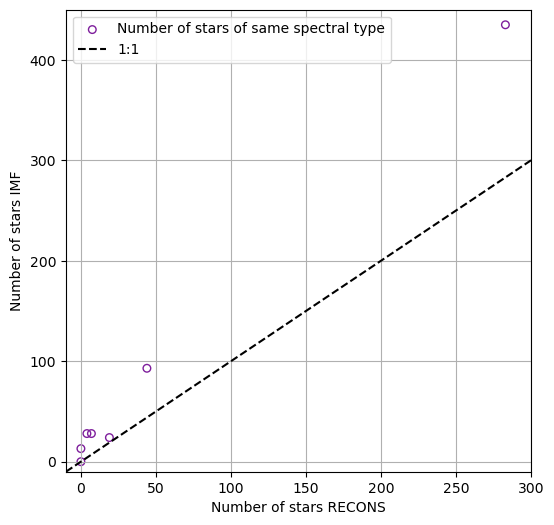

In [143]:
g1=plt.figure(figsize=[6,6]) 
plt.scatter(np.array(types['number_found']), np.array(number_type_m_phi), s=30, facecolors='none', edgecolors='xkcd:purple', label='Number of stars of same spectral type')
plt.plot(np.arange(-10, 400, 1),np.arange(-10, 400, 1), color='xkcd:black', linestyle='--', label='1:1')
plt.xlim([-10, 300])
plt.ylim([-10, 450])
plt.xlabel(r"Number of stars RECONS")
plt.ylabel(r"Number of stars IMF")
plt.grid()
plt.legend()
plt.savefig('recons.png', bbox_inches='tight', dpi=300)

C) What SFE would give you the best fit between the prediction from the IMF and RECONS? Plot your
revised IMF predictions vs. RECONS using filled triangles.

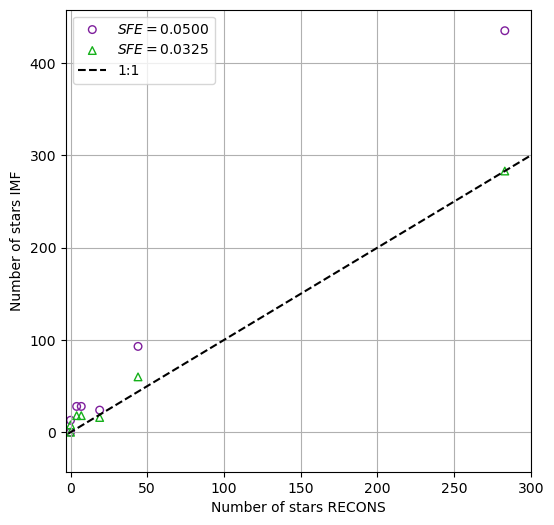

In [142]:
candidates=[]
ref=np.inf
for sfe_p in np.arange(0, 1, 0.0001):
    frac_type=[]
    for i in range(0,len(maxs)): frac_type.append(quad(m_phi_m, mins[i], maxs[i])[0])
    diff=np.array(types['number_found']) - np.int_((1/massa_tipica)*m_mc*sfe_p*np.array(frac_type))
    diff=sum(abs(diff))
    if diff < ref: 
        ref=diff
        candidates.append(sfe_p)

sfe_best=candidates[-1]
frac_type=[]
for i in range(0,len(maxs)): frac_type.append(quad(m_phi_m, mins[i], maxs[i])[0])
number_best=np.int_((1/massa_tipica)*m_mc*sfe_best*np.array(frac_type))

g2=plt.figure(figsize=[6,6]) 
plt.scatter(np.array(types['number_found']), np.array(number_type_m_phi), s=30, facecolors='none', edgecolors='xkcd:purple', label='$SFE = {:.4f}$'.format(0.05))
plt.scatter(np.array(types['number_found']), np.array(number_best), s=30, facecolors='none', edgecolors='xkcd:green', label='$SFE = {:.4f}$'.format(sfe_best), marker='^')
plt.plot(np.arange(-20, 400, 1),np.arange(-20, 400, 1), color='xkcd:black', linestyle='--', label='1:1')
plt.xlim([-3, 300])
plt.xlabel(r"Number of stars RECONS")
plt.ylabel(r"Number of stars IMF")
plt.grid()
plt.legend()
plt.savefig('best_sfe.png', bbox_inches='tight', dpi=300)


D) Use equation (5.6) from Maciel’s book to estimate the “turn off” mass at the current solar age (4,6
Gyr). Plot a vertical dashed line at this turn off mass.

Massa de turnoff: 1.248 massas solares. Ou seja tipo espectrais de massa típica maior do que 1.25 massas solares já passaram pelo turnoff point: O,B,A,F


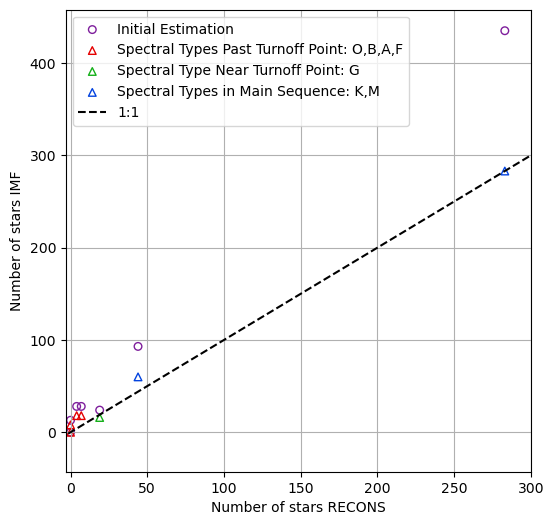

In [141]:
t=4.6*10**(9)
coefs=[1, -3.6,10-np.log10(t)]  
massa=10**(np.roots(coefs)[1])
print(r"Massa de turnoff: {:.3f} massas solares. Ou seja tipo espectrais de massa típica maior do que 1.25 massas solares já passaram pelo turnoff point: O,B,A,F".format(massa))

g3=plt.figure(figsize=[6,6]) 
plt.scatter(np.array(types['number_found']), np.array(number_type_m_phi), s=30, facecolors='none', edgecolors='xkcd:purple', label='Initial Estimation')
plt.scatter(np.array(types['number_found'])[0:4], np.array(number_best)[0:4], s=30, facecolors='none', edgecolors='xkcd:red', label='Spectral Types Past Turnoff Point: O,B,A,F', marker='^')
plt.scatter(np.array(types['number_found'])[4], np.array(number_best)[4], s=30, facecolors='none', edgecolors='xkcd:green', label='Spectral Type Near Turnoff Point: G', marker='^')
plt.scatter(np.array(types['number_found'])[5:7], np.array(number_best)[5:7], s=30, facecolors='none', edgecolors='xkcd:blue', label='Spectral Types in Main Sequence: K,M', marker='^')
plt.plot(np.arange(-20, 400, 1),np.arange(-20, 400, 1), color='xkcd:black', linestyle='--', label='1:1')
plt.xlim([-3, 300])
plt.xlabel(r"Number of stars RECONS")
plt.ylabel(r"Number of stars IMF")
plt.grid()
plt.legend()
plt.savefig('turnoff.png',bbox_inches='tight', dpi=300)

E) Interpret the plot in the context of the IMF, PDMF, SFE, turn off mass and stellar evolution.

This plot elucidates how the IMF by Miller & Scalo tends to favor the creation of low mass stars instead of massive ones. The PDMF also tends to follow this trend, as the data of RECONS can agree with the predictions of the IMF given the right SFE. In the context of this calculations, SFE is well suited as a free parameter. For an age of 4.6 Gyr, the turnoff mass is close the typical mass of type G stars. That means that all the spectral types "above" G (O,B,A,F) are already past the main sequence while K and M stars are still transforming Hydrogen into Helium via nuclear fission in its cores.  

### Problem 2

As mentioned in the SFR lesson, the star formation rate can be obtained using Kennicutt’s relation:
$SFR = (2.5\pm0.7) \times 10^{-4} \Sigma_g^{1.40\pm0.15} M_\odot \text{kpc}^{-2} \text{yr}^{-1}$, where the surface gas density ($\Sigma_g$) is in $M_\odot \text{pc}^{-2}.$

A) For the Milky Way we can consider a present mean $SFR = 5 M_\odot$ pc $^{-2}$ Gyr $^{-1}$. Use Kennicutt´s “law”
to estimate the corresponding present mean surface gas density in the Milky Way in $M_\odot \text{pc}^{-2}$.


In [22]:
import uncertainties as un
import uncertainties.unumpy as unp

coef=2.5
expo=1.40
sfr_mw=5 # for 1 giga year
sfr_mw=sfr_mw/10**9 # for 1 year
sigma_mw=(sfr_mw*(10**4)/coef)**(1/expo)
print('{:2e}'.format(sigma_mw))



4.401420e-04


B) Estimate the SFR (in $M_\odot \text{pc}^{-2} \text{Gyr}^{-1}$) for a starburst galaxy with $\Sigma_g = 10^{4.6} M_\odot \text{pc}{-2}$.


In [21]:
sigma=10**4.6
sfr=coef*(10**(-4))*(sigma**expo) #for 1 year
sfr=sfr*(10**9) #for 1 giga year
print('{:.2e}'.format(sfr))

6.89e+11


C) What is the ratio between the SFRs of the starburst galaxy and the present mean SFR in the
Milky Way ($SFR_{starburst} / SFR_{MW}$)

In [23]:
print('{:.2e}'.format(sfr/sfr_mw))

1.38e+20
